# Customer Churn Analysis (Projects Dynamics -15 )

In [46]:
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt
import scipy
from scipy.stats import zscore
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.externals import joblib
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('churn.csv',sep='\t')
data
# Customer churn is when a company’s customers stop doing business with that company.
# Businesses are very keen on measuring churn because keeping an existing customer is far less expensive than acquiring a new customer.
# New business involves working leads through a sales funnel, using marketing and sales budgets to gain additional customers. 
# Existing customers will often have a higher volume of service consumption and can generate additional customer referrals.
# Preventing customer churn is critically important to the telecommunications sector, as the barriers to entry for switching services are so low.
# Here we will examine customer data from IBM Sample Data Sets with the aim of building and comparing several customer churn prediction models.
# Target -> Churn(Binary output)

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,414-4276,no,yes,36,156.2,77,26.55,...,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,370-3271,no,no,0,231.1,57,39.29,...,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,328-8230,no,no,0,180.8,109,30.74,...,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,364-6381,yes,no,0,213.8,105,36.35,...,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False


In [3]:
df=pd.DataFrame(data=data)
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


# Data Pre-Processing 

In [4]:
df.columns

Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn'],
      dtype='object')

In [5]:
df.info()
# No Null Values 
# datatypes - 8 float type, 8 integer type, 4 object type & 1 booltype(Target)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [6]:
dfc=df.copy()
# Taking a copy of orignal dataset t proceed further

In [7]:
le=LabelEncoder()
dfc['state']=le.fit_transform(dfc['state'])
dfc['area code']=le.fit_transform(dfc['area code'])
dfc['international plan']=le.fit_transform(dfc['international plan'])
dfc['voice mail plan']=le.fit_transform(dfc['voice mail plan'])
dfc['churn']=le.fit_transform(dfc['churn'])
## Converting all the object datatypes into numerical one

# Univariate Analysis

In [8]:
df1c=dfc.drop('phone number',axis=1)
df1c.columns
# lets drop this column its of nu use for churn analysis purpose. 

Index(['state', 'account length', 'area code', 'international plan',
       'voice mail plan', 'number vmail messages', 'total day minutes',
       'total day calls', 'total day charge', 'total eve minutes',
       'total eve calls', 'total eve charge', 'total night minutes',
       'total night calls', 'total night charge', 'total intl minutes',
       'total intl calls', 'total intl charge', 'customer service calls',
       'churn'],
      dtype='object')

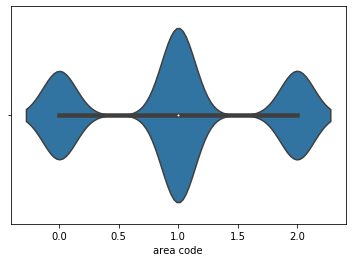

In [9]:
sns.violinplot(x='area code',data=df1c)
plt.show()
# we can observe most nuber of customer are from area code 415

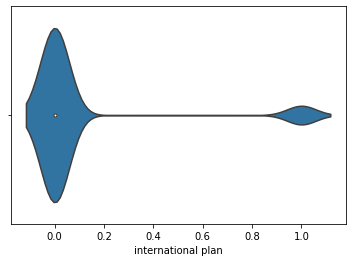

In [10]:
sns.violinplot(x='international plan',data=df1c)
plt.show()
# Most clients dont have internation plan activated in their package

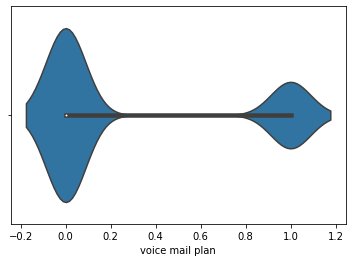

In [11]:
sns.violinplot(x='voice mail plan',data=df1c)
plt.show()
# Most clients have voice mail plan activated in their package

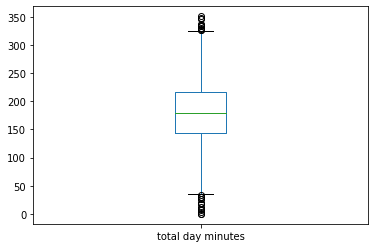

In [12]:
df1c['total day minutes'].plot.box()
# observation - clients talk on average between 150-200 mins on phone

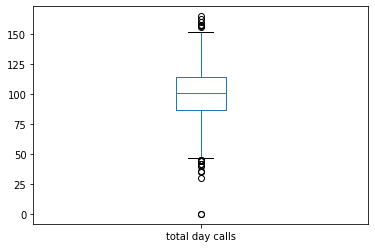

In [13]:
df1c['total day calls'].plot.box()
# observation - clients make on average 75-130 calls a day

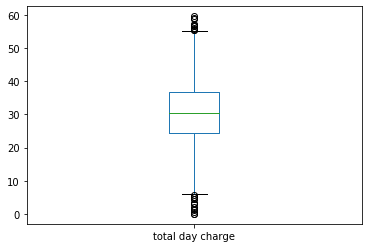

In [14]:
df1c['total day charge'].plot.box()
# observation - charges/daytime come around 25-35 unit on average

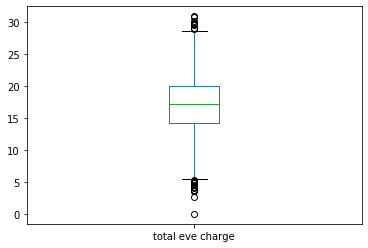

In [15]:
df1c['total eve charge'].plot.box()
# observation - evening charges come around 15-20 units a day

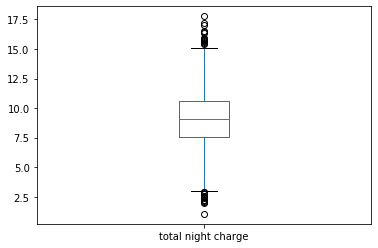

In [16]:
df1c['total night charge'].plot.box()
# observation - night charges comes around 7-10 units a day  on average

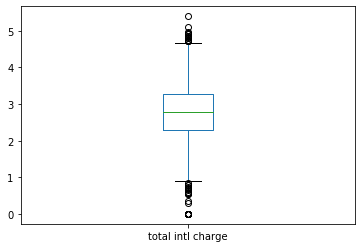

In [17]:
df1c['total intl charge'].plot.box()

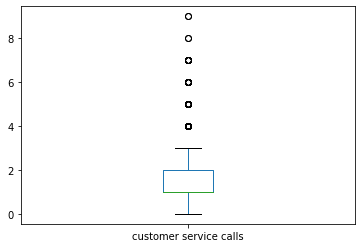

In [18]:
df1c['customer service calls'].plot.box()

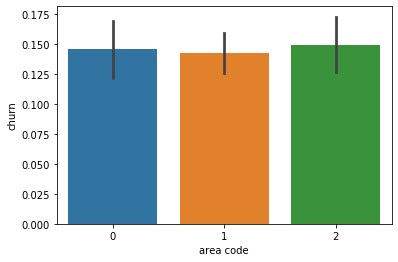

In [19]:
sns.barplot(x='area code',y='churn',data=df1c)
# customer attrition ratio is more or less same in all three areas

# Bivariate Analysis

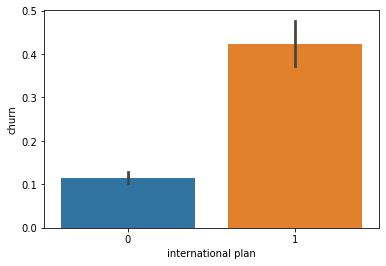

In [20]:
sns.barplot(x='international plan',y='churn',data=df1c)
# clients having intl plan in their package are more prone to churn

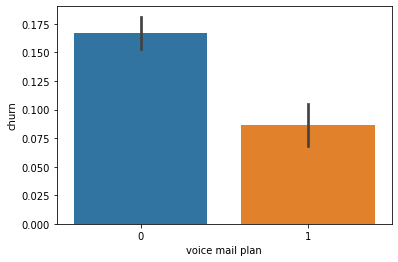

In [21]:
sns.barplot(x='voice mail plan',y='churn',data=df1c)
# clients not having vaoice mail plan in their package are more prone to churn

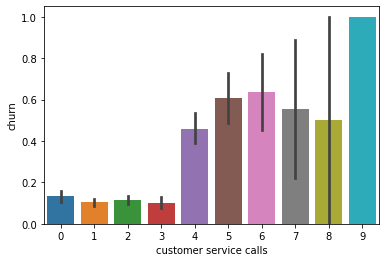

In [22]:
sns.barplot(x='customer service calls',y='churn',data=df1c)
# clients who make more number of calls to service provoder, are prone to churn more. possibly those call are meant for registering complaints 

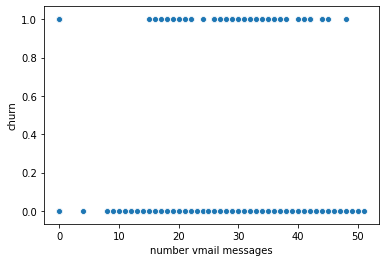

In [23]:
sns.scatterplot(x='number vmail messages',y='churn',data=df1c)

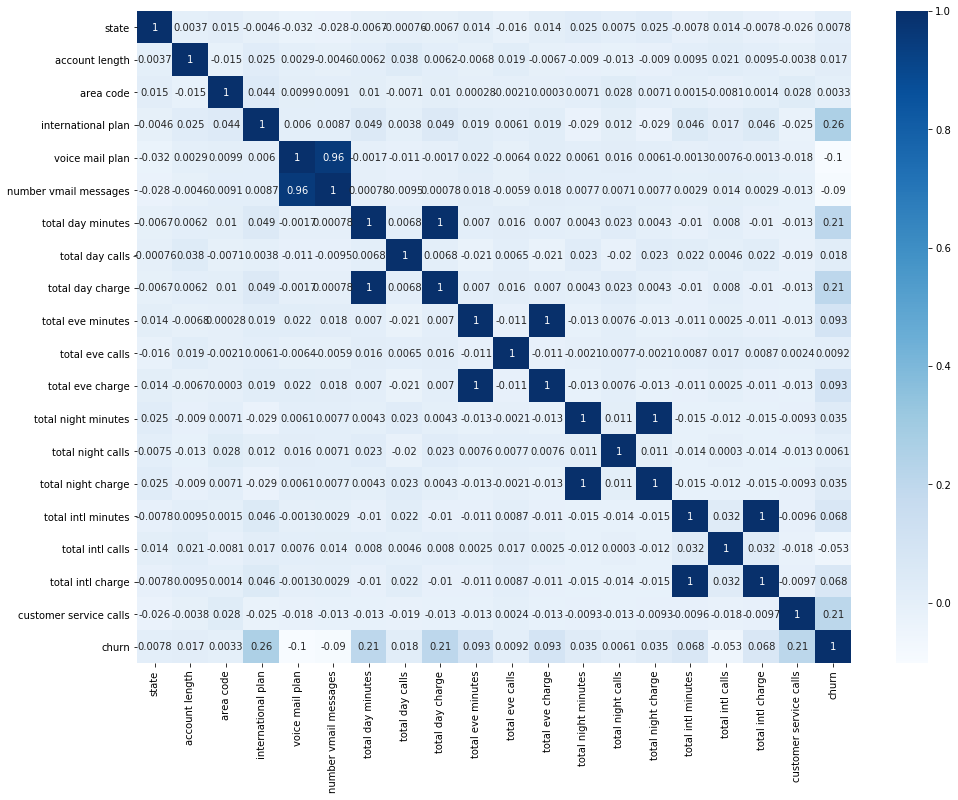

In [24]:
plt.figure(figsize=(16,12))
sns.heatmap(df1c.corr(),cmap='Blues',annot=True)
# observation - churn is negative corelation with vmail messages, intl calls. 
# also it shows more the customer making calls for servce/complaints, more they are prone to churn

In [25]:
df1c.skew()
# Checking the skewness.
# intl plan column is hoghly skewed, also vmail messgaes

state                    -0.064618
account length            0.096606
area code                -0.000858
international plan        2.726332
voice mail plan           0.999140
number vmail messages     1.264824
total day minutes        -0.029077
total day calls          -0.111787
total day charge         -0.029083
total eve minutes        -0.023877
total eve calls          -0.055563
total eve charge         -0.023858
total night minutes       0.008921
total night calls         0.032500
total night charge        0.008886
total intl minutes       -0.245136
total intl calls          1.321478
total intl charge        -0.245287
customer service calls    1.091359
churn                     2.018356
dtype: float64

In [26]:
df1c['international plan']=np.log1p(df1c['international plan'])

In [27]:
df1c.skew()

state                    -0.064618
account length            0.096606
area code                -0.000858
international plan        2.726332
voice mail plan           0.999140
number vmail messages     1.264824
total day minutes        -0.029077
total day calls          -0.111787
total day charge         -0.029083
total eve minutes        -0.023877
total eve calls          -0.055563
total eve charge         -0.023858
total night minutes       0.008921
total night calls         0.032500
total night charge        0.008886
total intl minutes       -0.245136
total intl calls          1.321478
total intl charge        -0.245287
customer service calls    1.091359
churn                     2.018356
dtype: float64

In [28]:
df1c['number vmail messages']=np.cbrt(df1c['number vmail messages'])

In [29]:
df1c.skew()

state                    -0.064618
account length            0.096606
area code                -0.000858
international plan        2.726332
voice mail plan           0.999140
number vmail messages     1.036027
total day minutes        -0.029077
total day calls          -0.111787
total day charge         -0.029083
total eve minutes        -0.023877
total eve calls          -0.055563
total eve charge         -0.023858
total night minutes       0.008921
total night calls         0.032500
total night charge        0.008886
total intl minutes       -0.245136
total intl calls          1.321478
total intl charge        -0.245287
customer service calls    1.091359
churn                     2.018356
dtype: float64

# Model Training 

In [30]:
x=df1c.iloc[:,0:-1] # feature columns
y=df1c.iloc[:,-1]  # target

In [31]:
x.shape,y.shape

((3333, 19), (3333,))

In [32]:
scale=StandardScaler()
x=scale.fit_transform(x)
# scaling the data to regularize

# Applying Logistic Regression to train the model 

In [33]:
maxr=0
for i in range(41,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=i,test_size=0.3)
    lg=LogisticRegression()
    lg.fit(x_train,y_train)
    pred=lg.predict(x_test)
    score=accuracy_score(y_test,pred)
    print('accuracy score correspondng to random state',i,'is:',score)
    if score>maxr:
        maxr=score
        finalr=i
print()
print('maximum accuracy score corresponding to random state',finalr,'is',maxr)

accuracy score correspondng to random state 41 is: 0.844
accuracy score correspondng to random state 42 is: 0.863
accuracy score correspondng to random state 43 is: 0.879
accuracy score correspondng to random state 44 is: 0.87
accuracy score correspondng to random state 45 is: 0.86
accuracy score correspondng to random state 46 is: 0.867
accuracy score correspondng to random state 47 is: 0.874
accuracy score correspondng to random state 48 is: 0.876
accuracy score correspondng to random state 49 is: 0.866
accuracy score correspondng to random state 50 is: 0.863
accuracy score correspondng to random state 51 is: 0.854
accuracy score correspondng to random state 52 is: 0.864
accuracy score correspondng to random state 53 is: 0.853
accuracy score correspondng to random state 54 is: 0.852
accuracy score correspondng to random state 55 is: 0.86
accuracy score correspondng to random state 56 is: 0.877
accuracy score correspondng to random state 57 is: 0.856
accuracy score correspondng to ran

In [48]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=68,test_size=0.3)
lg.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

0.889
[[820  52]
 [ 59  69]]
              precision    recall  f1-score   support

           0       0.93      0.94      0.94       872
           1       0.57      0.54      0.55       128

    accuracy                           0.89      1000
   macro avg       0.75      0.74      0.75      1000
weighted avg       0.89      0.89      0.89      1000

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0

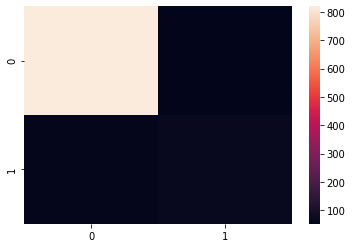

In [49]:
score=accuracy_score(y_test,pred)
matrix=confusion_matrix(y_test,pred)
report=classification_report(y_test,pred)
pred=lg.predict(x_test)
print(score)
print(matrix)
print(report)
print(pred)
print(sns.heatmap(matrix))
print('\n')
cvs=cross_val_score(lg,x,y,cv=15,scoring='accuracy')
print('Cross_val_score is:\n',cvs.mean())

# Applying Other Algorithms to train the model

0.887
              precision    recall  f1-score   support

           0       0.89      1.00      0.94       872
           1       1.00      0.12      0.21       128

    accuracy                           0.89      1000
   macro avg       0.94      0.56      0.57      1000
weighted avg       0.90      0.89      0.85      1000

[[872   0]
 [113  15]]
Cross_val_score is:
 0.8766910408166015


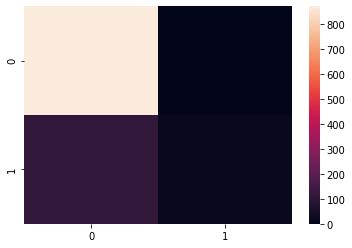

In [36]:
knn= KNeighborsClassifier(n_neighbors=20)
knn.fit(x_train,y_train)
pred=knn.predict(x_test)
print(accuracy_score(y_test,pred))
print(classification_report(y_test,pred))
print(confusion_matrix(y_test,pred))
sns.heatmap(confusion_matrix(y_test,pred))
cvs=cross_val_score(knn,x,y,cv=15,scoring='accuracy')
print('Cross_val_score is:\n',cvs.mean())

In [37]:
dtc=DecisionTreeClassifier()
param_grid={'criterion':['gini','entropy']}
grid=GridSearchCV(dtc,param_grid,scoring='accuracy',cv=20)
grid.fit(x,y)
print(grid.best_score_)
print(grid.best_params_)

0.9237987879662362
{'criterion': 'entropy'}


0.92
              precision    recall  f1-score   support

           0       0.95      0.96      0.95       872
           1       0.70      0.66      0.68       128

    accuracy                           0.92      1000
   macro avg       0.82      0.81      0.82      1000
weighted avg       0.92      0.92      0.92      1000

[[835  37]
 [ 43  85]]
Cross_val_score is:
 0.920494485516907


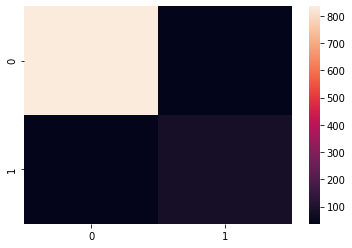

In [38]:
dtc=DecisionTreeClassifier(criterion='entropy')
dtc.fit(x_train,y_train)
pred=dtc.predict(x_test)
print(accuracy_score(y_test,pred))
print(classification_report(y_test,pred))
print(confusion_matrix(y_test,pred))
sns.heatmap(confusion_matrix(y_test,pred))
cvdtc=cross_val_score(dtc,x,y,cv=15,scoring='accuracy')
print('Cross_val_score is:\n',cvdtc.mean())

0.889
              precision    recall  f1-score   support

           0       0.93      0.94      0.94       872
           1       0.57      0.54      0.55       128

    accuracy                           0.89      1000
   macro avg       0.75      0.74      0.75      1000
weighted avg       0.89      0.89      0.89      1000

[[820  52]
 [ 59  69]]
Cross_val_score is:
 0.8658950430250878


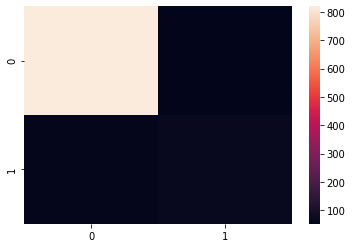

In [39]:
gb=GaussianNB()
gb.fit(x_train,y_train)
pred=gb.predict(x_test)
print(accuracy_score(y_test,pred))
print(classification_report(y_test,pred))
print(confusion_matrix(y_test,pred))
sns.heatmap(confusion_matrix(y_test,pred))
cvs=cross_val_score(gb,x,y,cv=15,scoring='accuracy')
print('Cross_val_score is:\n',cvs.mean())

In [40]:
svc=SVC()
param_grid={'kernel':['poly','rbf','linear']}
grid=GridSearchCV(svc,param_grid)
grid.fit(x,y)
print(grid.best_score_)
print(grid.best_params_)

0.9183930557243901
{'kernel': 'rbf'}


0.889
              precision    recall  f1-score   support

           0       0.93      0.94      0.94       872
           1       0.57      0.54      0.55       128

    accuracy                           0.89      1000
   macro avg       0.75      0.74      0.75      1000
weighted avg       0.89      0.89      0.89      1000

[[820  52]
 [ 59  69]]
Cross_val_score is:
 0.9207974790934432


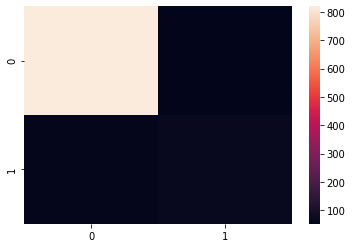

In [41]:
svc=SVC(kernel='rbf')
svc.fit(x_train,y_train)
predsvc=svc.predict(x_test)
print(accuracy_score(y_test,pred))
print(classification_report(y_test,pred))
print(confusion_matrix(y_test,pred))
sns.heatmap(confusion_matrix(y_test,pred))
cvsvc=cross_val_score(svc,x,y,cv=15,scoring='accuracy')
print('Cross_val_score is:\n',cvsvc.mean())

# Observation and Conclusion

In [42]:
# As we can observe Logistic regression is providing accuracy score of 0.889 and Cross_val_score of 0.8607
# As we can observe Knn is providing accuracy score of 0.887 and Cross_val_score of 0.8766
# As we can observe dtc is providing accuracy score of 0.915 and Cross_val_score of 0.9201
# # As we can observe gb is providing accuracy score of 0.889 and Cross_val_score of 0.865
# As we can observe SVC is providing accuracy score of 0.917 and Cross_val_score of 0.9207

In [43]:
# so we can save the SVC to train the model and save it

# Saving the most suitable Model

In [44]:
joblib.dump(svc,'svcchurn.obj')

['svcchurn.obj']

In [45]:
predsvc ## predicting the y_test

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,